In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import random
from scipy.stats import skew, kurtosis, variation, moment
import scipy.integrate as integrate
from math import sqrt, exp, pi
import math

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
    def __str__(self):
        return self._repr_html_()

def average(arr):
    res = 0
    for i in arr:
        res += i
    return res / len(arr)

def std_sqrt_deviation(arr):
    res = 0
    avg = average(arr)
    for i in arr:
        res += (i - avg)**2
    return sqrt(res / len(arr))

In [3]:
'''Вариант 1.
Из колоды (36 карт) наудачу извлекаются 3 карты.
Найти вероятность того, что сумма очков этих карт будет равна 21.'''

card_types = [2, 3, 4, 6, 7, 8, 9, 10, 11]
n = [10, 100, 1000, 10**6]
k = 10
def make_deck():
    cards = []
    for i in card_types:
        for j in range(0, 4):
            cards.append(i)
    return cards

def draw(cards):
    return cards.pop(random.randrange(0, len(cards)))

def play():
    cards = make_deck()
    score = 0
    for i in range(0, 3):
        score += draw(cards)
    return score

def make_n_plays(n):
    count = 0
    plays = []
    for i in range(0, n):
        p = play()
        if p == 21:
            count += 1
        plays.append(p)
    return count / n, plays

solution = 0.078991596 #put solution here
for j in n:
    table = ListTable()
    table.append(['P', 'P*', 'Delta'])
    sigma = 0
    for i in range(0, k):
        p, plays = make_n_plays(j)
        sigma += solution - p
        #table.append([solution, p, solution - p, std_sqrt_deviation(plays)])
        table.append([solution, p, solution - p])
    
    print('n = {}'.format(j))
    display(table)
    print('sigma: {0}'.format(sigma / k))
    print('')

n = 10


P,P*,Delta
0.078991596,0.0,0.078991596
0.078991596,0.1,-0.02100840400000001
0.078991596,0.2,-0.12100840400000001
0.078991596,0.1,-0.02100840400000001
0.078991596,0.2,-0.12100840400000001
0.078991596,0.0,0.078991596
0.078991596,0.0,0.078991596
0.078991596,0.1,-0.02100840400000001
0.078991596,0.0,0.078991596
0.078991596,0.2,-0.12100840400000001


sigma: -0.011008404000000008

n = 100


P,P*,Delta
0.078991596,0.07,0.00899159599999999
0.078991596,0.06,0.018991596
0.078991596,0.11,-0.031008404000000003
0.078991596,0.03,0.048991596
0.078991596,0.04,0.038991595999999996
0.078991596,0.08,-0.0010084040000000044
0.078991596,0.08,-0.0010084040000000044
0.078991596,0.1,-0.02100840400000001
0.078991596,0.09,-0.011008404
0.078991596,0.1,-0.02100840400000001


sigma: 0.0029915959999999965

n = 1000


P,P*,Delta
0.078991596,0.086,-0.007008403999999996
0.078991596,0.069,0.009991595999999991
0.078991596,0.087,-0.008008403999999997
0.078991596,0.072,0.006991596000000003
0.078991596,0.071,0.007991596000000004
0.078991596,0.066,0.012991595999999994
0.078991596,0.072,0.006991596000000003
0.078991596,0.086,-0.007008403999999996
0.078991596,0.089,-0.010008403999999999
0.078991596,0.071,0.007991596000000004


sigma: 0.002091596000000001

n = 1000000


P,P*,Delta
0.078991596,0.079244,-0.00025240399999999774
0.078991596,0.078818,0.00017359599999999809
0.078991596,0.079005,-1.340400000000852e-05
0.078991596,0.078621,0.0003705960000000008
0.078991596,0.078955,3.659599999999985e-05
0.078991596,0.079397,-0.0004054039999999981
0.078991596,0.079292,-0.0003004040000000041
0.078991596,0.079274,-0.000282404
0.078991596,0.078803,0.0001885959999999992
0.078991596,0.079063,-7.140399999999714e-05


sigma: -5.5604000000000764e-05



In [4]:
'''Вариант 5.
В круге радиуса R проводятся хорды параллельно заданному направлению.
Какова вероятность того, что длина наугад взятой хорды не более R,
если равновозможны любые положения точек пересечения хорды с диаметром,
перпендикулярным выбранному направлению?'''

R = 1000
k = 10

def draw_chord():
    return sqrt(R**2 - random.uniform(0, R)**2) * 2

def make_n_attempts(n):
    count = 0
    attempts = []
    for i in range(0, n):
        chord = draw_chord()
        count += chord <= R
        attempts.append(chord)
    return count / n, attempts

solution = 1 - sqrt(3)/2
for j in n:
    table = ListTable()
    table.append(['P', 'P*', 'Delta', 'sigma'])
    for i in range(0, k):
        p, attempts = make_n_attempts(j)
        table.append([solution, p, solution - p, std_sqrt_deviation(attempts)])
        #print(p)
        #print(std_sqrt_deviation(attempts))
    print('n = {}'.format(j))
    display(table)
    print('')

n = 10


P,P*,Delta,sigma
0.1339745962155614,0.1,0.0339745962155614,367.31879858782406
0.1339745962155614,0.0,0.1339745962155614,236.81122791455334
0.1339745962155614,0.1,0.0339745962155614,355.1635682219195
0.1339745962155614,0.1,0.0339745962155614,501.9835584321347
0.1339745962155614,0.1,0.0339745962155614,485.30922253762617
0.1339745962155614,0.1,0.0339745962155614,333.864430224276
0.1339745962155614,0.0,0.1339745962155614,277.3538872294191
0.1339745962155614,0.2,-0.06602540378443861,410.9473963761912
0.1339745962155614,0.0,0.1339745962155614,265.8817464992206
0.1339745962155614,0.2,-0.06602540378443861,452.2543636256896



n = 100


P,P*,Delta,sigma
0.1339745962155614,0.1,0.0339745962155614,453.1520558798218
0.1339745962155614,0.13,0.003974596215561399,486.95462829070397
0.1339745962155614,0.17,-0.03602540378443861,494.12134767833123
0.1339745962155614,0.14,-0.00602540378443861,496.7856294911779
0.1339745962155614,0.17,-0.03602540378443861,484.9014142145532
0.1339745962155614,0.15,-0.01602540378443859,483.92541831850934
0.1339745962155614,0.08,0.0539745962155614,413.23651260644317
0.1339745962155614,0.08,0.0539745962155614,346.0653159562542
0.1339745962155614,0.11,0.023974596215561403,424.44427392416327
0.1339745962155614,0.12,0.013974596215561408,434.7947441798214



n = 1000


P,P*,Delta,sigma
0.1339745962155614,0.14,-0.00602540378443861,451.5675167587419
0.1339745962155614,0.139,-0.005025403784438609,446.64689024902816
0.1339745962155614,0.122,0.011974596215561406,427.0084117378664
0.1339745962155614,0.123,0.010974596215561405,447.7130324664438
0.1339745962155614,0.137,-0.0030254037844386072,452.1001185059983
0.1339745962155614,0.13,0.003974596215561399,443.6450101786607
0.1339745962155614,0.152,-0.018025403784438593,466.6808294815282
0.1339745962155614,0.151,-0.017025403784438592,472.6877303015913
0.1339745962155614,0.141,-0.007025403784438583,449.5621646564541
0.1339745962155614,0.142,-0.008025403784438584,443.3917364058218



n = 1000000


P,P*,Delta,sigma
0.1339745962155614,0.134379,-0.00040440378443859504,446.42054298737037
0.1339745962155614,0.133812,0.0001625962155614169,446.20315616360233
0.1339745962155614,0.133908,6.659621556140416e-05,446.15433429551
0.1339745962155614,0.134028,-5.340378443860483e-05,446.7337432468422
0.1339745962155614,0.133577,0.0003975962155614021,445.9714487344992
0.1339745962155614,0.133808,0.00016659621556139315,446.10160292720815
0.1339745962155614,0.133874,0.00010059621556141041,446.2572866953564
0.1339745962155614,0.133513,0.0004615962155614106,446.019739726166
0.1339745962155614,0.133995,-2.040378443859958e-05,446.4624254590703
0.1339745962155614,0.133751,0.00022359621556139464,446.13169717935784


In [5]:
def shot():
    v = random.uniform(0.0,1.0)
    if v < 0.5:
        return 10
    elif v < 0.8:
        return 5
    else:
        return -1
    
def make_shots():
    res = 0
    for i in range(0, 3):
        res += shot()
    return res

def make_shots_list(n):
    res = []
    for i in range(0, n):
        res.append(make_shots())
    return res

def cdf(shots):
    data = np.cumsum(np.histogram(shots, bins=auto, density=True))
        
shots = make_shots_list(100000)

In [6]:
import collections
x_dict = {}
for i in shots:
    if i not in x_dict:
        x_dict[i] = 1
    else:
        x_dict[i] += 1    
x_dict = collections.OrderedDict(sorted(x_dict.items()))
x_table = ListTable()
x_table.append([])
x_table.append([])
n = len(shots)
for i, k in x_dict.items():
    x_table[0].append(i)
    x_table[1].append(k / n)
x_table

-3,3,8,9,14,15,19,20,25,30
0.00791,0.03622,0.06029,0.05401,0.17922,0.02724,0.14975,0.13329,0.22705,0.12502


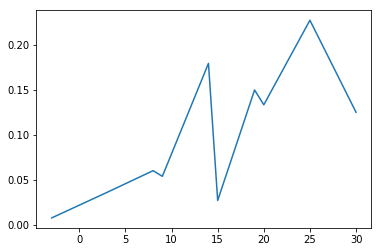

In [7]:
plt.plot(x_table[0], x_table[1])

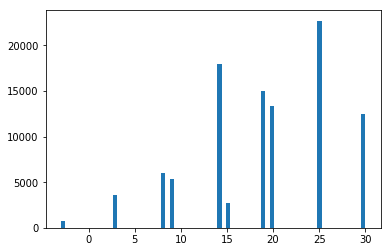

In [8]:
def histogram(shots):
    return plt.hist(shots, bins='auto')

a,b,c = histogram(shots)

c:\users\kirich\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



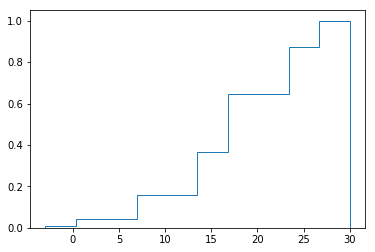

In [9]:
def cdf_plot(shots):
    plt.hist(shots, normed=True, cumulative=True, label='CDF', histtype='step', range=(-3, 30))
cdf_plot(shots)

In [10]:
print("E: {0}".format(average(shots)))

E: 18.90892


In [11]:
print("D: {0}".format(np.var(shots)))

D: 54.1394044336


In [12]:
print(skew(shots))

-0.40319101402052243


In [13]:
print(kurtosis(shots))

-0.3279192883818909


In [14]:
def prob(series, k):
    if k < series[0][0]:
        return 0
    elif k > series[0][-1]:
        return 1
    else:
        return series[1][np.searchsorted(series[0], k)]
    
def prob_range(series, k, t):
    return prob(series, t) - prob(series, k)

prob_range(x_table, 2, 7)

0.02407

In [15]:
def density(x):
    return 1/sqrt(pi) * exp(-(x**2))

density(40)

0.0

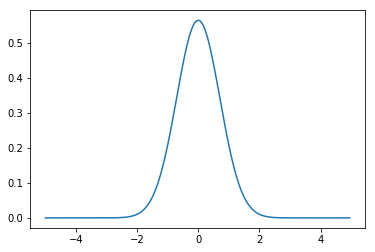

In [16]:
start = -5
step = 0.05
steps = -(start + start) / step
x_axis = list(map(lambda x : start + step * x, range(0, int(steps))))
y_axis = list(map(density, x_axis))
plt.plot(x_axis, y_axis)

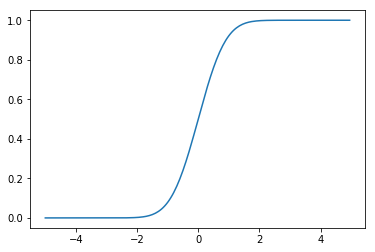

In [17]:
result = list(map(lambda x: integrate.quad(density, -math.inf, x)[0],x_axis))
plt.plot(x_axis, result)

In [18]:
k = 100000
data = [ random.normalvariate(0, sqrt(1 / pi)) for i in range(0, k)]

print("E: {0}".format(average(data)))
print("D: {0}".format(np.var(data)))
print(skew(data))
print(kurtosis(data))

E: -2.7223440858943376e-05
D: 0.3166919559696123
-0.009267235239538547
0.0014834545678223954


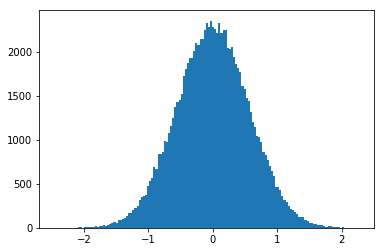

In [19]:
a,b,c = histogram(data)

c:\users\kirich\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



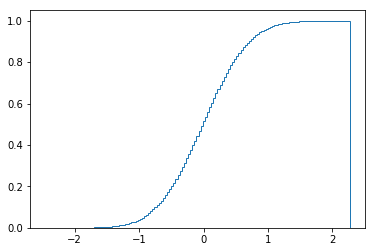

In [20]:
a = plt.hist(data, normed=True, cumulative=True, label='CDF', histtype='step', bins='auto')